In [21]:
import os
import pandas as pd
from dotenv import load_dotenv
import json
import matplotlib.pyplot as plt

load_dotenv()

local_data_dir = os.environ['LOCAL_DATA_DIR']
print(local_data_dir)

../..


In [22]:
def load_json(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

In [24]:
path = f"{local_data_dir}/flood_data/v{os.environ['VERSION']}/results"
result_files = ["country_metrics.json", "mask_distribution.json"]

data1 = load_json(f"{path}/{result_files[0]}")
data2 = load_json(f"{path}/{result_files[1]}")

df1 = pd.DataFrame.from_dict(data1, orient='index')
df2 = pd.DataFrame.from_dict(data2, orient='index')

df = df1.merge(df2, left_index=True, right_index=True, how='outer')
df.head(12)

,Mean IOU,F1 score,Precision,Recall,amount_of_images,mean_water_proportion,little_water,a_lot_of_water
Bolivia,0.620110,0.726298,0.803034,0.687081,15,0.115678,0.800000,0.000000
Ghana,0.656840,0.751289,0.749826,0.752773,53,0.041581,0.924528,0.000000
India,0.698281,0.800075,0.845642,0.767635,68,0.104102,0.882353,0.000000
Mekong,0.793644,0.880331,0.912311,0.856496,30,0.218733,0.633333,0.033333
Nigeria,0.704173,0.813682,0.873071,0.778866,18,0.200978,0.722222,0.111111
Pakistan,0.572738,0.661874,0.652151,0.673384,28,0.054919,0.928571,0.000000
Paraguay,0.705898,0.802526,0.927813,0.739712,67,0.079661,0.880597,0.000000
Somalia,0.537954,0.604091,0.653723,0.581568,26,0.051332,0.961538,0.000000
Spain,0.826378,0.899930,0.900050,0.899811,30,0.129255,0.766667,0.000000
Sri-Lanka,NaN,NaN,NaN,NaN,42,0.106758,0.857143,0.047619


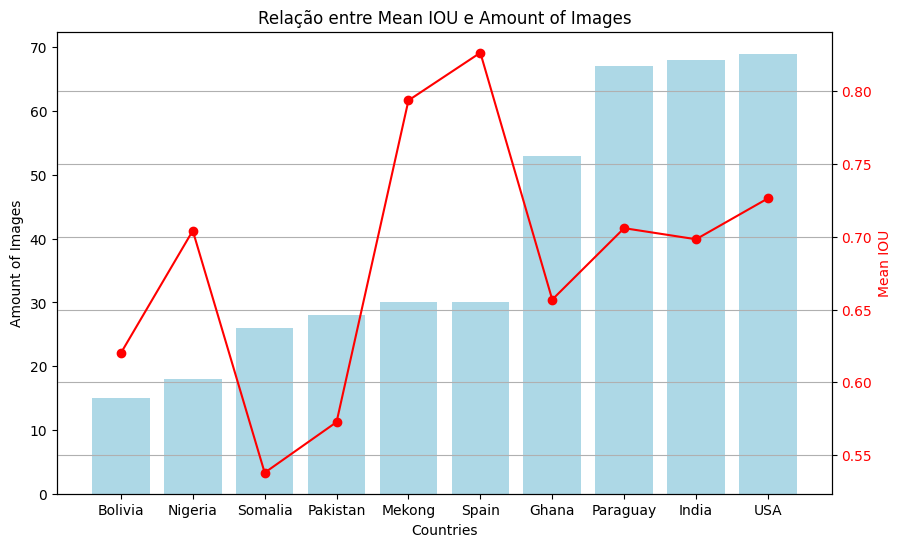

In [29]:
df_sorted = df.dropna(subset=['Mean IOU']).sort_values(by='amount_of_images')

fig, ax1 = plt.subplots(figsize=(10, 6))

# Amount of Images - Bar Plot
ax1.bar(df_sorted.index, df_sorted['amount_of_images'], color='lightblue', label='Amount of Images')
ax1.set_xlabel('Countries')
ax1.set_ylabel('Amount of Images')
ax1.tick_params(axis='y')

# Mean IOU - Line Plot
ax2 = ax1.twinx()
ax2.plot(df_sorted.index, df_sorted['Mean IOU'], color='red', marker='o', label='Mean IOU')
ax2.set_ylabel('Mean IOU', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Relação entre Mean IOU e Amount of Images')

plt.grid(True)
plt.show()

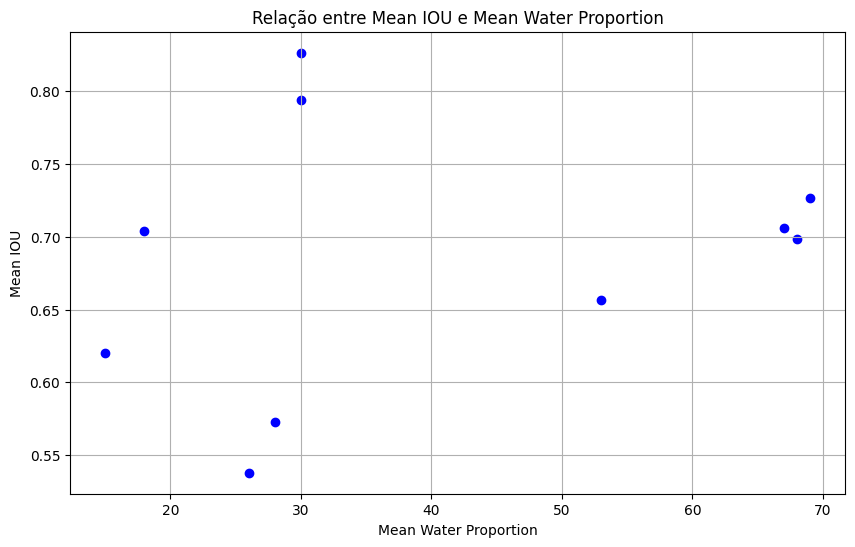

In [36]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.scatter(df_sorted['amount_of_images'], df_sorted['Mean IOU'], color='blue', label='Mean IOU vs Amount of Images')

ax1.set_xlabel('Amount of Images')
ax1.set_ylabel('Mean IOU')
ax1.tick_params(axis='y')

plt.title('Relação entre Mean IOU e Amount of Images')

plt.grid(True)
plt.show()

In [26]:
correlation_matrix = df.corr()

final_corr_matrix = correlation_matrix[["amount_of_images", "mean_water_proportion", "little_water", "a_lot_of_water"]].loc[["Mean IOU", "F1 score", "Precision", "Recall"]]
final_corr_matrix.head()

,amount_of_images,mean_water_proportion,little_water,a_lot_of_water
Mean IOU,0.221207,0.562205,-0.610237,0.202496
F1 score,0.235312,0.590819,-0.629104,0.260928
Precision,0.244808,0.625285,-0.640531,0.305101
Recall,0.205073,0.511697,-0.566318,0.204784


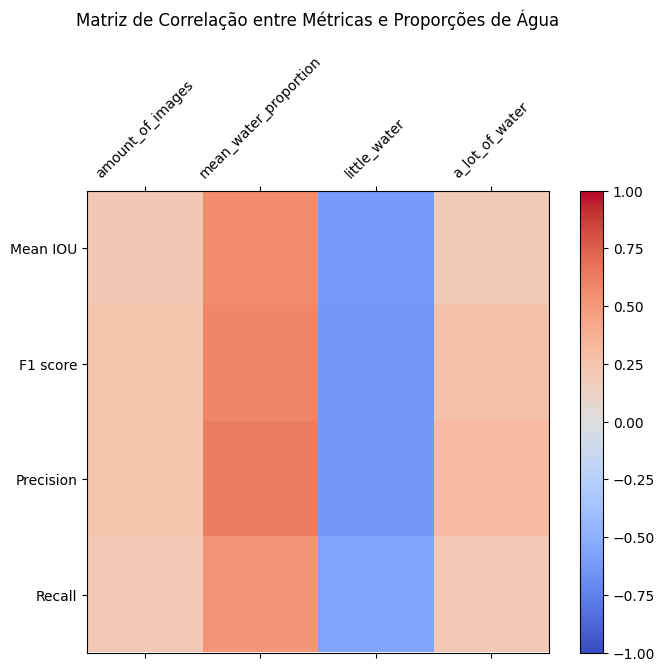

In [27]:
correlation_matrix = df.corr()

final_corr_matrix = correlation_matrix[["amount_of_images", "mean_water_proportion", "little_water", "a_lot_of_water"]].loc[["Mean IOU", "F1 score", "Precision", "Recall"]]

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(final_corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

plt.xticks(range(len(final_corr_matrix.columns)), final_corr_matrix.columns, rotation=45)
plt.yticks(range(len(final_corr_matrix.index)), final_corr_matrix.index)

fig.colorbar(cax)

plt.title('Matriz de Correlação entre Métricas e Proporções de Água', pad=20)
plt.show()

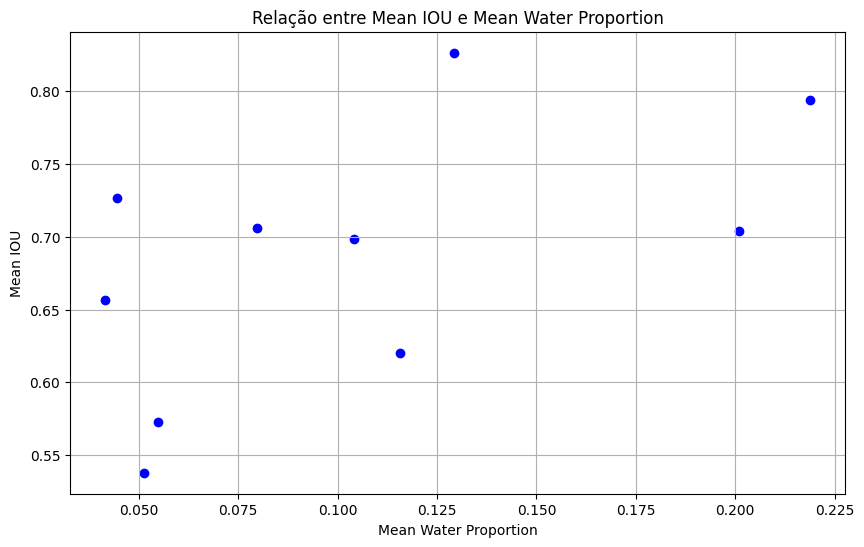

In [34]:
df_sorted = df.dropna(subset=['Mean IOU']).sort_values(by='mean_water_proportion')

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.scatter(df_sorted['mean_water_proportion'], df_sorted['Mean IOU'], color='blue', label='Mean IOU vs Mean Water Proportion')

ax1.set_xlabel('Mean Water Proportion')
ax1.set_ylabel('Mean IOU')
ax1.tick_params(axis='y')

plt.title('Relação entre Mean IOU e Mean Water Proportion')

plt.grid(True)
plt.show()